In [ ]:
pip install snowflake-connector-python
pip install Prophet

In [2]:
import pandas as pd
import numpy as np
import snowflake.connector
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Collection 

### Connecting to Snowflake

In [5]:
import snowflake.connector
import pandas as pd

# Create connection
conn = snowflake.connector.connect(
    user='dbt',
    password='dbtPassword123',
    account='JQUHIZK-IY64015',        
    warehouse='COMPUTE_WH',
    database='CIRCUS_OPS_REPORTING_LAYER',
    schema='CIRCUS_OPS_REPORTING_LAYER.RAW',
    role='TRANSFORM'               # optional
)

# Check connection
cs = conn.cursor()
cs.execute("SELECT CURRENT_VERSION()")
print("Connected to Snowflake version:", cs.fetchone())

Connected to Snowflake version: ('9.31.0',)


### Pulling & aggregating the data

In [6]:
query = """
SELECT
    product_id,
    order_date,
    SUM(quantity) AS total_quantity
FROM CIRCUS_OPS_REPORTING_LAYER.RAW_CURATED.TBL_FACT_ORDER_PRODUCT
GROUP BY product_id, order_date
ORDER BY product_id, order_date
"""

df = pd.read_sql(query, conn)
print("✅ Data Loaded from Snowflake:", df.shape)



C:\Users\krish\AppData\Local\Temp\ipykernel_5620\3641824943.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


✅ Data Loaded from Snowflake: (2616, 3)


In [7]:
df.head()

,PRODUCT_ID,ORDER_DATE,TOTAL_QUANTITY
0,1,2024-10-03,10
1,1,2024-10-04,1
2,1,2024-10-05,7
3,1,2024-10-06,12
4,1,2024-10-07,1


# Preprocessing the Data

In [17]:
all_results = []

products = df['PRODUCT_ID'].unique()
forecast_horizon = 30  # days

for product in products:
    prod_df = df[df['PRODUCT_ID'] == product][['ORDER_DATE', 'TOTAL_QUANTITY']]
    prod_df = prod_df.rename(columns={'ORDER_DATE': 'ds', 'TOTAL_QUANTITY': 'y'}).sort_values('ds')

    # Fill missing dates with 0
    full_dates = pd.date_range(start=prod_df['ds'].min(), end=prod_df['ds'].max())
    prod_df = prod_df.set_index('ds').reindex(full_dates, fill_value=0).rename_axis('ds').reset_index()

# Model Budiling 

### Fitting the model

#### Forecast on test + future period (30 days)

13:43:58 - cmdstanpy - INFO - Chain [1] start processing
13:43:58 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\krish\AppData\Local\Temp\ipykernel_5620\650124644.py:37: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100


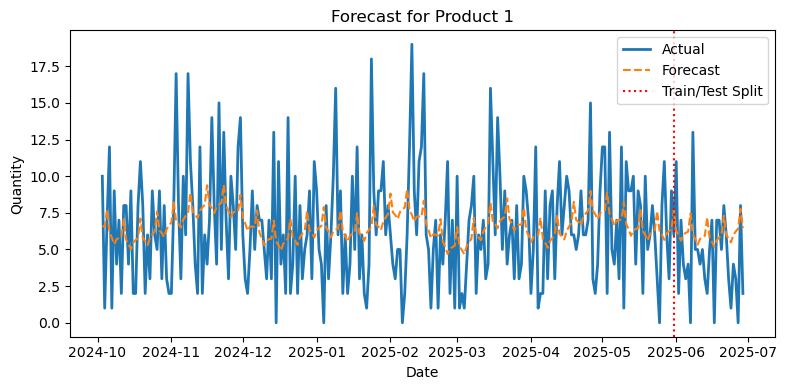

13:43:59 - cmdstanpy - INFO - Chain [1] start processing
13:43:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\krish\AppData\Local\Temp\ipykernel_5620\650124644.py:37: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100


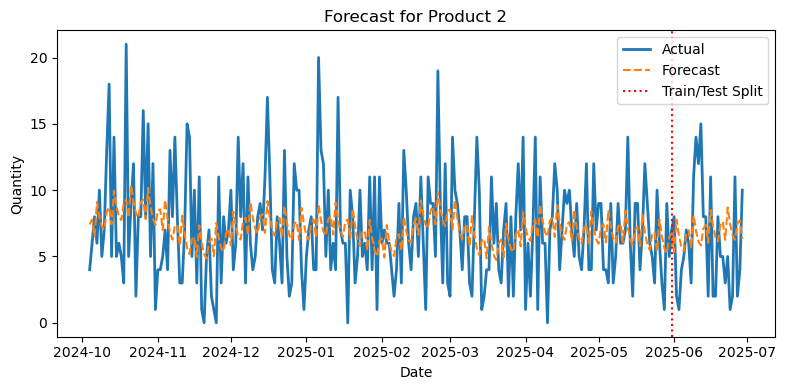

13:44:00 - cmdstanpy - INFO - Chain [1] start processing
13:44:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\krish\AppData\Local\Temp\ipykernel_5620\650124644.py:37: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100


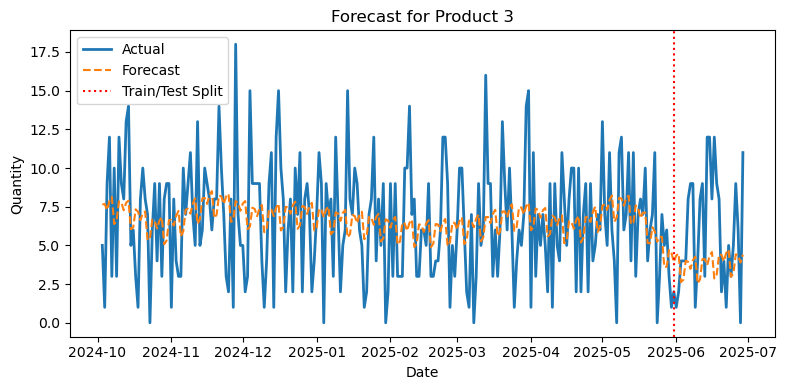

13:44:01 - cmdstanpy - INFO - Chain [1] start processing
13:44:01 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\krish\AppData\Local\Temp\ipykernel_5620\650124644.py:37: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100


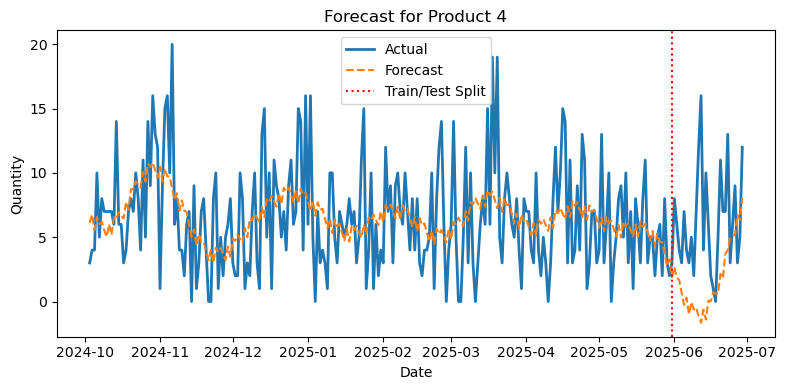

13:44:02 - cmdstanpy - INFO - Chain [1] start processing
13:44:02 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\krish\AppData\Local\Temp\ipykernel_5620\650124644.py:37: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100


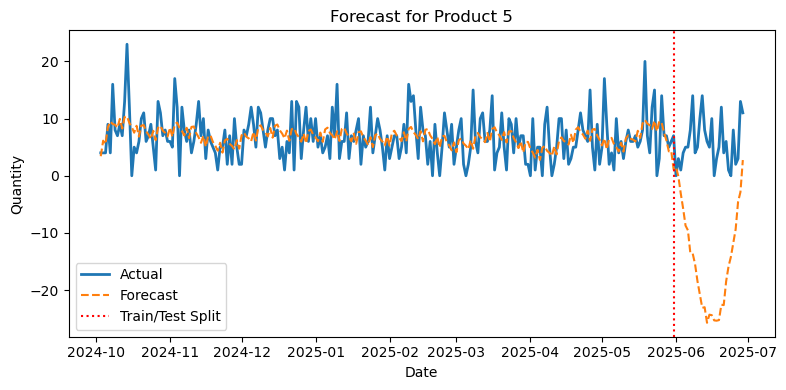

13:44:03 - cmdstanpy - INFO - Chain [1] start processing
13:44:03 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\krish\AppData\Local\Temp\ipykernel_5620\650124644.py:37: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100


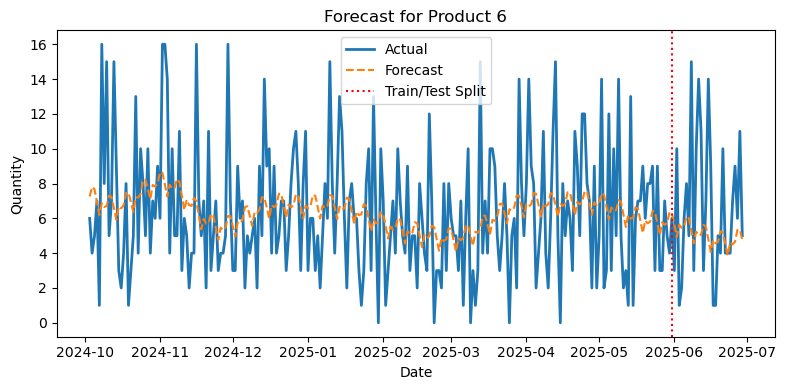

13:44:04 - cmdstanpy - INFO - Chain [1] start processing
13:44:04 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\krish\AppData\Local\Temp\ipykernel_5620\650124644.py:37: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100


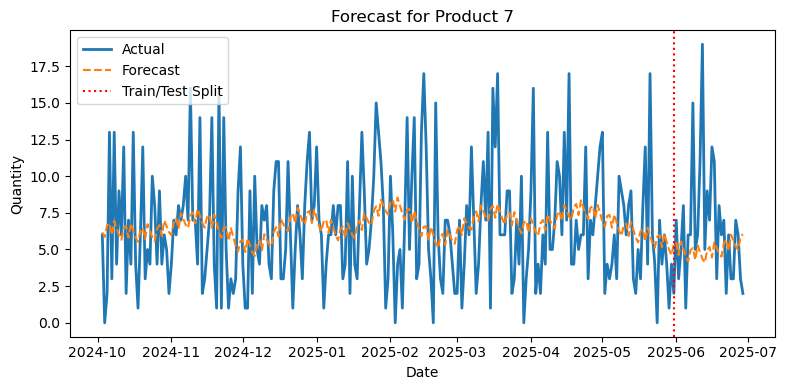

13:44:05 - cmdstanpy - INFO - Chain [1] start processing
13:44:05 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\krish\AppData\Local\Temp\ipykernel_5620\650124644.py:37: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100


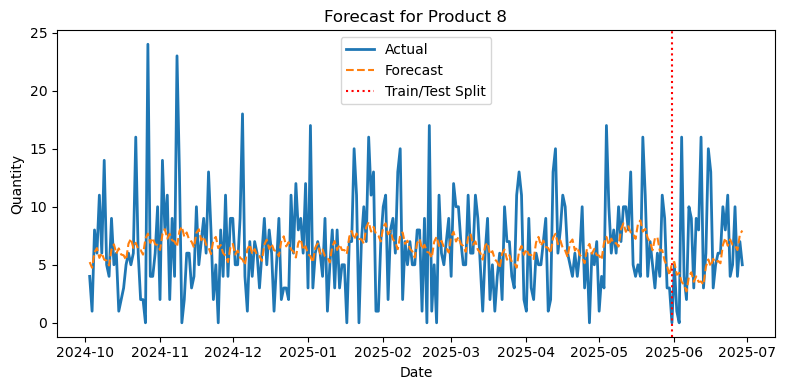

13:44:06 - cmdstanpy - INFO - Chain [1] start processing
13:44:06 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\krish\AppData\Local\Temp\ipykernel_5620\650124644.py:37: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100


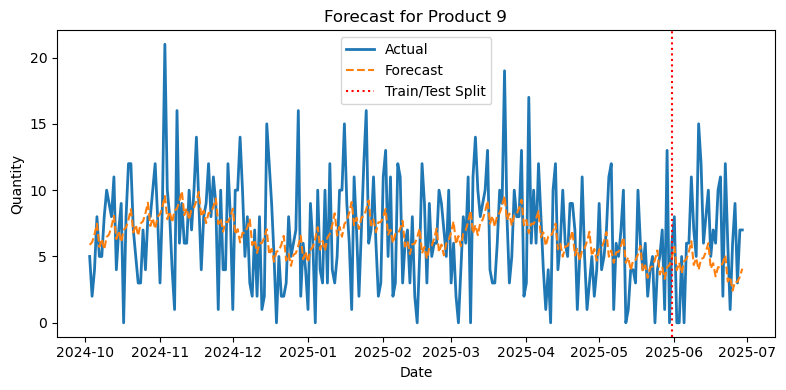

13:44:07 - cmdstanpy - INFO - Chain [1] start processing
13:44:07 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\krish\AppData\Local\Temp\ipykernel_5620\650124644.py:37: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100


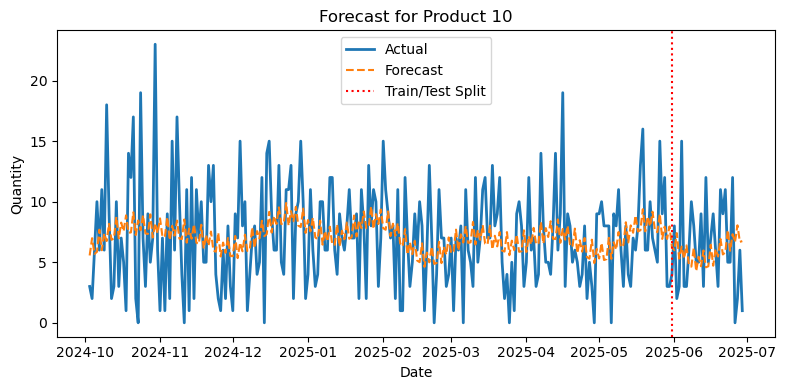

In [26]:
all_results = []
metrics = []

products = df['PRODUCT_ID'].unique()
forecast_horizon = 30  # days

for product in products:
    prod_df = df[df['PRODUCT_ID'] == product][['ORDER_DATE', 'TOTAL_QUANTITY']]
    prod_df = prod_df.rename(columns={'ORDER_DATE': 'ds', 'TOTAL_QUANTITY': 'y'}).sort_values('ds')

    # Fill missing dates with 0
    full_dates = pd.date_range(start=prod_df['ds'].min(), end=prod_df['ds'].max())
    prod_df = prod_df.set_index('ds').reindex(full_dates, fill_value=0).rename_axis('ds').reset_index()

    # -----------------------------
    # Train-test split (last 30 days = test)
    # -----------------------------
    train = prod_df.iloc[:-forecast_horizon]
    test = prod_df.iloc[-forecast_horizon:]

    # -----------------------------
    # Fit Prophet model on training data
    # -----------------------------
    model = Prophet(daily_seasonality=True, yearly_seasonality=True)
    model.fit(train)

    # Forecast for test + future horizon
    future = model.make_future_dataframe(periods=forecast_horizon)
    forecast = model.predict(future)

    # -----------------------------
    # Evaluation on test set
    # -----------------------------
    test_forecast = forecast.set_index('ds').loc[test['ds']]
    mae = mean_absolute_error(test['y'], test_forecast['yhat'])
    rmse = np.sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
    mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / np.maximum(test['y'], 1))) * 100

    metrics.append({
        'PRODUCT_ID': product,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    })

    # -----------------------------
    # Combine historical + forecast
    # -----------------------------
    combined = pd.DataFrame({
        'PRODUCT_ID': product,
        'FORECAST_DATE': forecast['ds'],
        'ACTUAL_QUANTITY': np.where(forecast['ds'].isin(prod_df['ds']),
                                    prod_df.set_index('ds')['y'].reindex(forecast['ds']).values,
                                    np.nan),
        'PREDICTED_QUANTITY': forecast['yhat']
    })
    all_results.append(combined)

    # -----------------------------
    # Plot actual vs predicted
    # -----------------------------
    plt.figure(figsize=(8, 4))
    plt.plot(prod_df['ds'], prod_df['y'], label='Actual', linewidth=2)
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
    plt.axvline(x=test['ds'].iloc[0], color='red', linestyle=':', label='Train/Test Split')
    plt.title(f"Forecast for Product {product}")
    plt.xlabel("Date")
    plt.ylabel("Quantity")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Model Evaluatation :  Forecast on Test Set

In [28]:
# Step 4: Combine all results
# -----------------------------
final_df = pd.concat(all_results)
final_df['FORECAST_DATE'] = final_df['FORECAST_DATE'].dt.date
metrics_df = pd.DataFrame(metrics)



In [29]:
final_df.head()

,PRODUCT_ID,FORECAST_DATE,ACTUAL_QUANTITY,PREDICTED_QUANTITY
0,1,2024-10-03,10.0,6.592371
1,1,2024-10-04,1.0,6.563039
2,1,2024-10-05,7.0,7.704427
3,1,2024-10-06,12.0,6.194304
4,1,2024-10-07,1.0,5.813115


In [32]:

# -----------------------------
# Step 4: Combine all products
# -----------------------------
final_df = pd.concat(all_results)

# Convert FORECAST_DATE to proper date for Snowflake
final_df['FORECAST_DATE'] = final_df['FORECAST_DATE'].dt.date

print(final_df.head())



   PRODUCT_ID FORECAST_DATE  ACTUAL_QUANTITY  PREDICTED_QUANTITY
0           1    2024-10-03             10.0            6.592371
1           1    2024-10-04              1.0            6.563039
2           1    2024-10-05              7.0            7.704427
3           1    2024-10-06             12.0            6.194304
4           1    2024-10-07              1.0            5.813115


# Step 5: Save to Snowflake

In [ ]:
# -----------------------------
# Step 5: Save to Snowflake
# -----------------------------
cur = conn.cursor()
cur.execute("""
CREATE OR REPLACE TABLE CIRCUS_OPS_REPORTING_LAYER.SALES_FORECAST.PRODUCT_FORECAST (
    PRODUCT_ID VARCHAR,
    FORECAST_DATE DATE,
    ACTUAL_QUANTITY FLOAT,
    PREDICTED_QUANTITY FLOAT
)
""")

success, nchunks, nrows, _ = write_pandas(
    conn,
    final_df,
    'PRODUCT_FORECAST',
    database='CIRCUS_OPS_REPORTING_LAYER',
    schema='SALES_FORECAST'
)


cur.close()
conn.close()


13:35:51 - cmdstanpy - INFO - Chain [1] start processing
13:35:51 - cmdstanpy - INFO - Chain [1] done processing


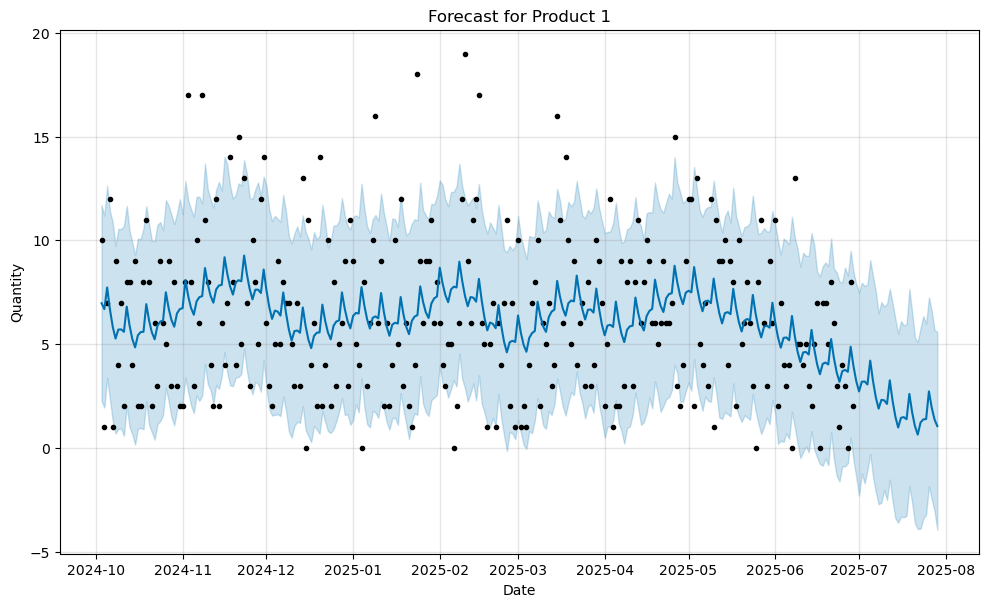

13:35:51 - cmdstanpy - INFO - Chain [1] start processing
13:35:51 - cmdstanpy - INFO - Chain [1] done processing


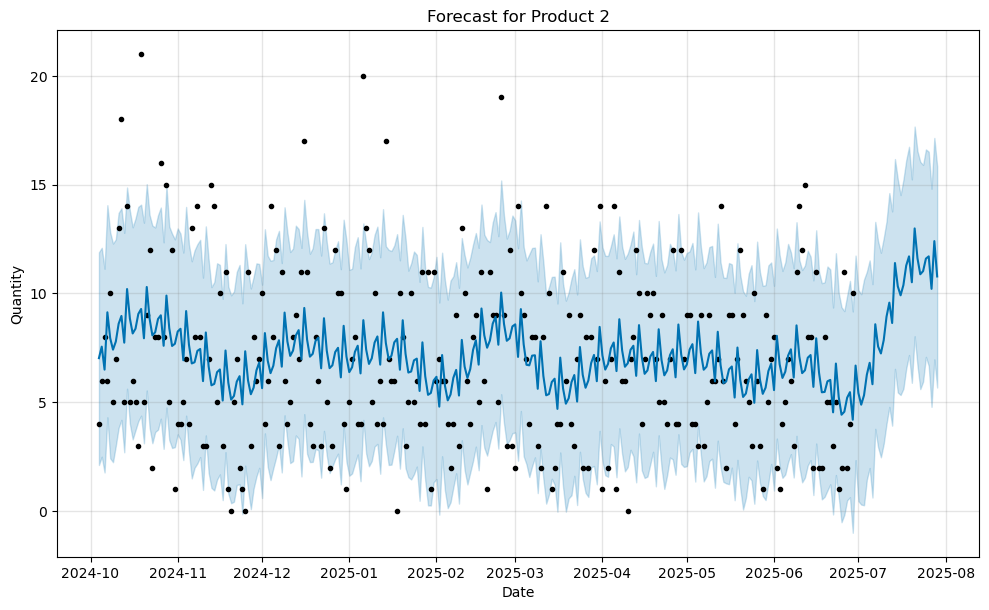

13:35:52 - cmdstanpy - INFO - Chain [1] start processing
13:35:52 - cmdstanpy - INFO - Chain [1] done processing


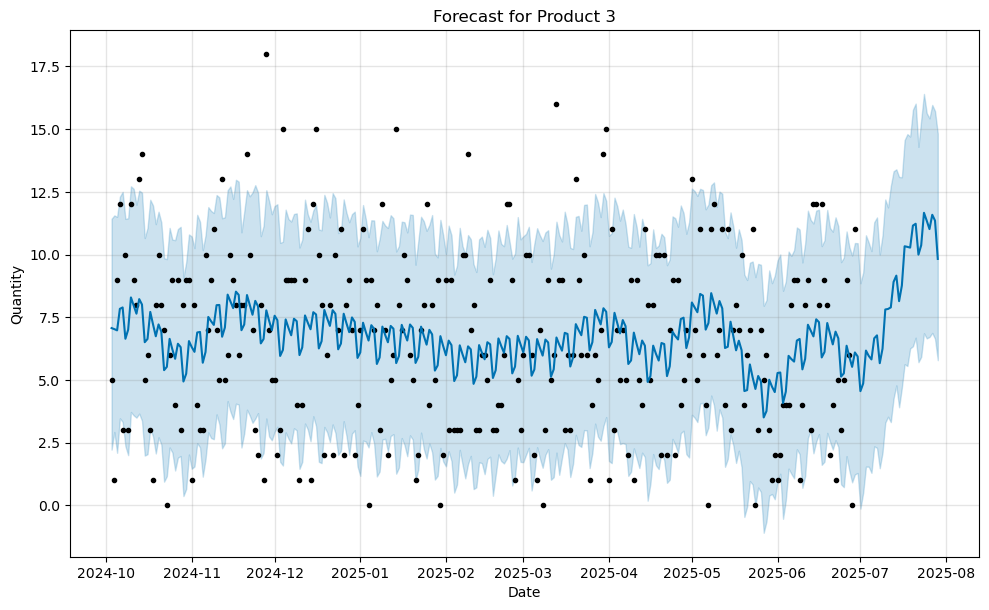

13:35:52 - cmdstanpy - INFO - Chain [1] start processing
13:35:52 - cmdstanpy - INFO - Chain [1] done processing


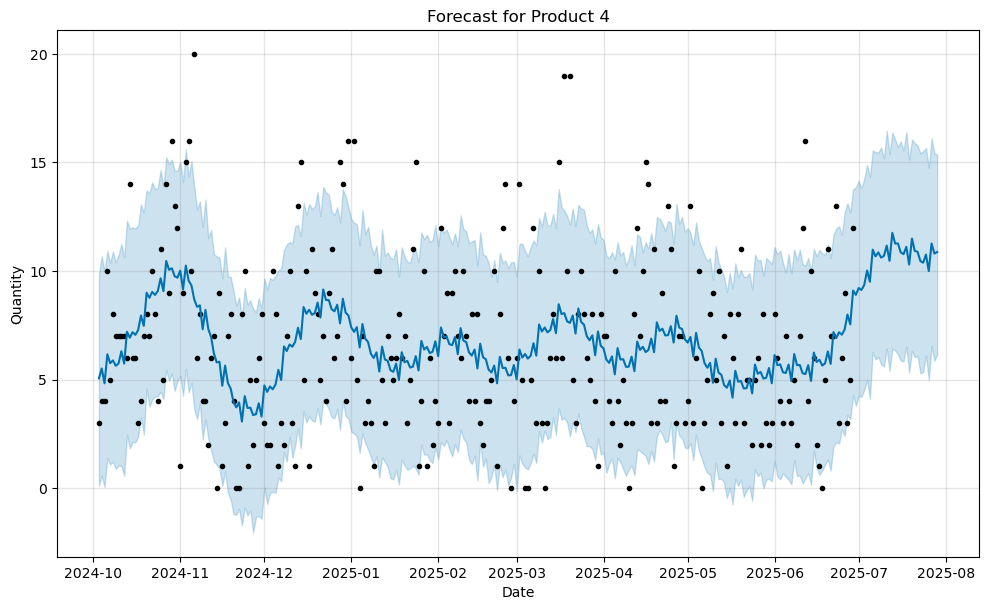

13:35:53 - cmdstanpy - INFO - Chain [1] start processing
13:35:53 - cmdstanpy - INFO - Chain [1] done processing


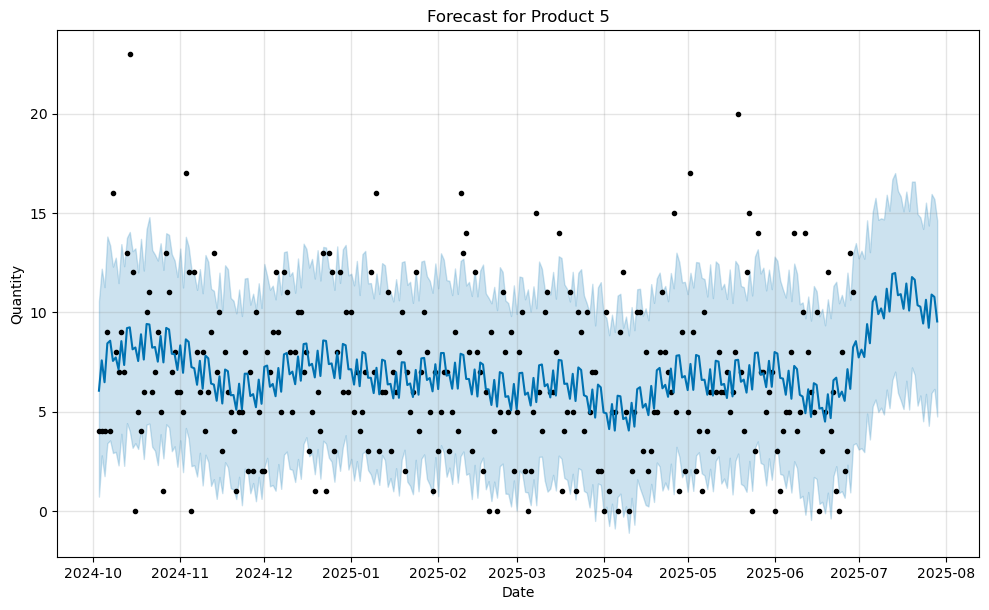

13:35:54 - cmdstanpy - INFO - Chain [1] start processing
13:35:54 - cmdstanpy - INFO - Chain [1] done processing


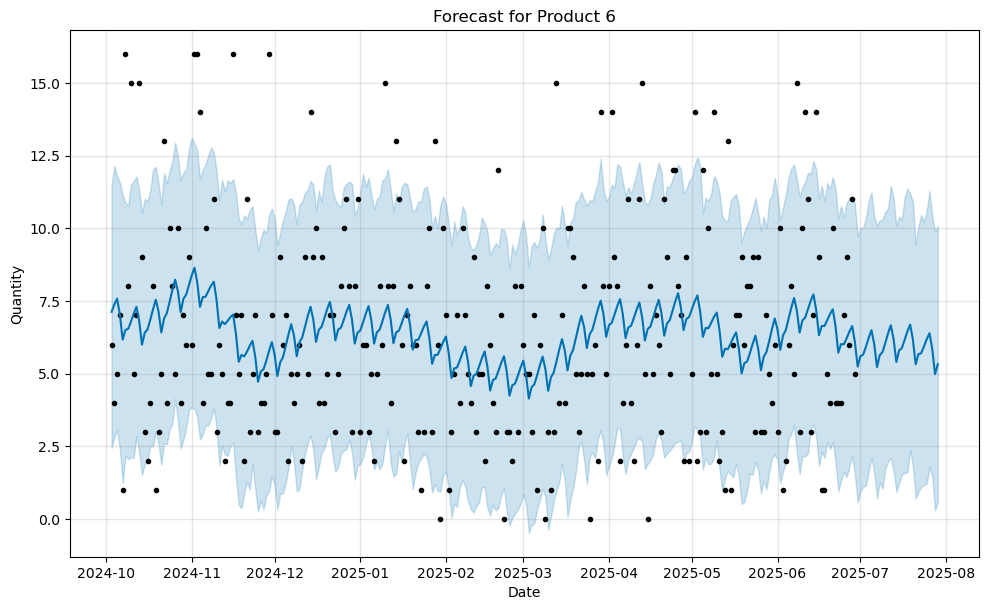

13:35:54 - cmdstanpy - INFO - Chain [1] start processing
13:35:54 - cmdstanpy - INFO - Chain [1] done processing


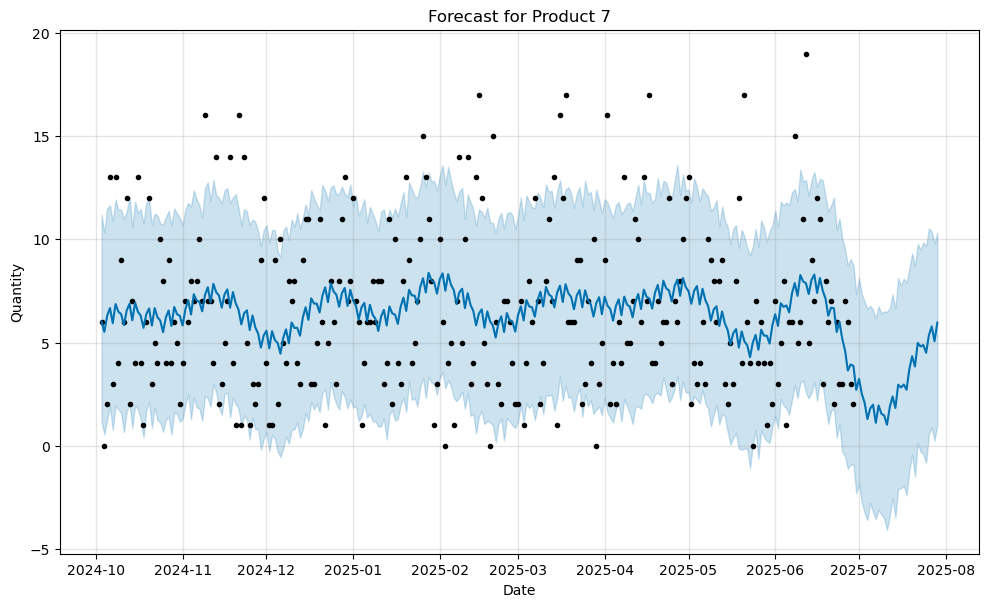

13:35:55 - cmdstanpy - INFO - Chain [1] start processing
13:35:55 - cmdstanpy - INFO - Chain [1] done processing


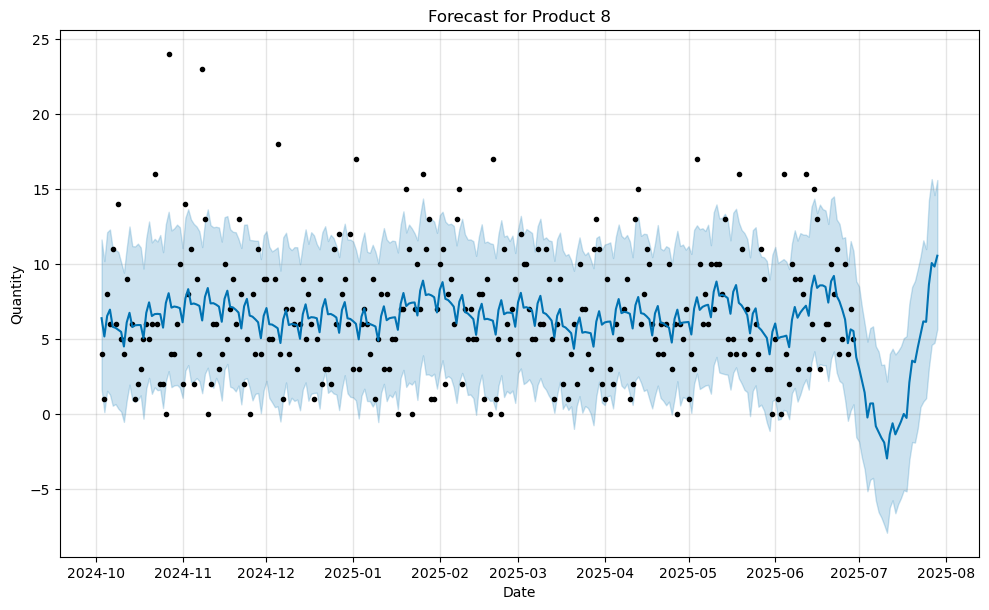

13:35:55 - cmdstanpy - INFO - Chain [1] start processing
13:35:55 - cmdstanpy - INFO - Chain [1] done processing


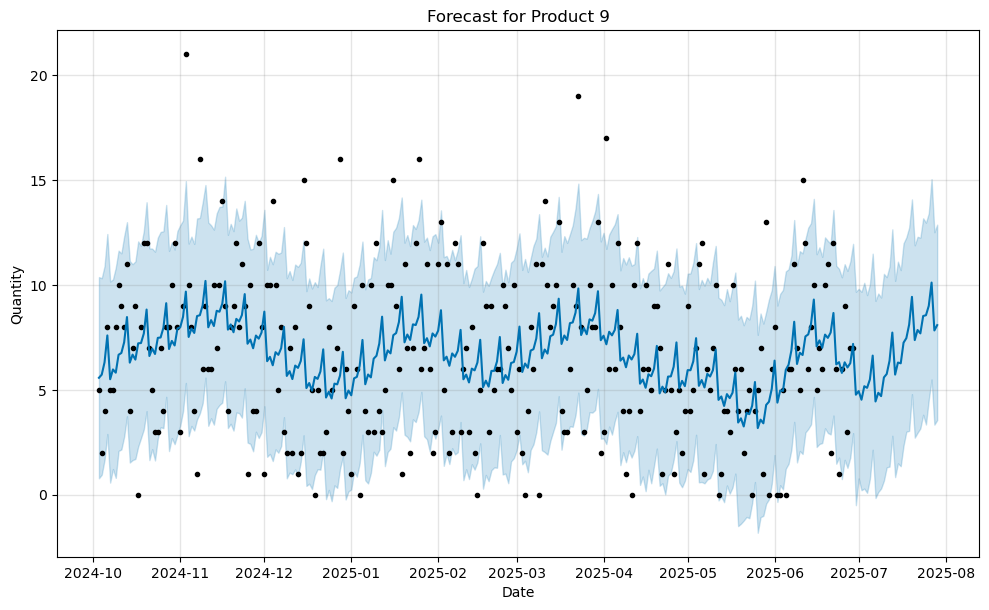

13:35:56 - cmdstanpy - INFO - Chain [1] start processing
13:35:56 - cmdstanpy - INFO - Chain [1] done processing


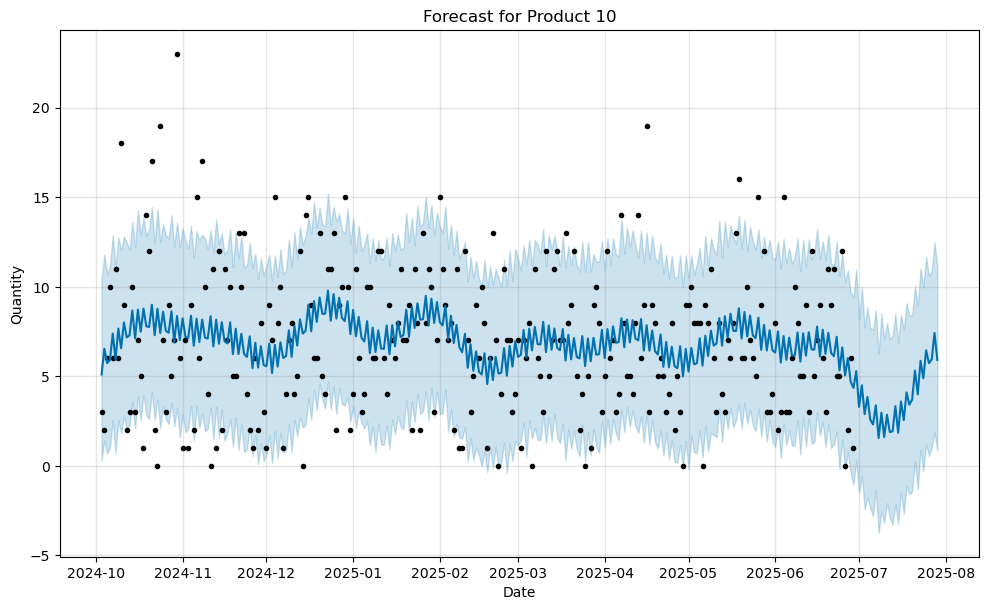

   PRODUCT_ID FORECAST_DATE  ACTUAL_QUANTITY  PREDICTED_QUANTITY
0           1    2024-10-03             10.0            6.970099
1           1    2024-10-04              1.0            6.685582
2           1    2024-10-05              7.0            7.729089
3           1    2024-10-06             12.0            6.664816
4           1    2024-10-07              1.0            5.835255


C:\Users\krish\AppData\Local\Temp\ipykernel_5620\3126315116.py:77: UserWarning: Pandas Dataframe has non-standard index of type <class 'pandas.core.indexes.base.Index'> which will not be written. Consider changing the index to pd.RangeIndex(start=0,...,step=1) or call reset_index() to keep index as column(s)
  success, nchunks, nrows, _ = write_pandas(


✅ Uploaded 2999 rows to PRODUCT_FORECAST table


In [16]:
import pandas as pd
import numpy as np
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
from prophet import Prophet
import matplotlib.pyplot as plt



# -----------------------------
# Step 4: Combine all products
# -----------------------------
final_df = pd.concat(all_results)

# Convert FORECAST_DATE to proper date for Snowflake
final_df['FORECAST_DATE'] = final_df['FORECAST_DATE'].dt.date

print(final_df.head())

# -----------------------------
# Step 5: Save to Snowflake
# -----------------------------
cur = conn.cursor()
cur.execute("""
CREATE OR REPLACE TABLE CIRCUS_OPS_REPORTING_LAYER.SALES_FORECAST.PRODUCT_FORECAST (
    PRODUCT_ID VARCHAR,
    FORECAST_DATE DATE,
    ACTUAL_QUANTITY FLOAT,
    PREDICTED_QUANTITY FLOAT
)
""")

success, nchunks, nrows, _ = write_pandas(
    conn,
    final_df,
    'PRODUCT_FORECAST',
    database='CIRCUS_OPS_REPORTING_LAYER',
    schema='SALES_FORECAST'
)

print(f"✅ Uploaded {nrows} rows to PRODUCT_FORECAST table")
cur.close()
conn.close()
